<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_MNIST_ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
# Processing Data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_label = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
           'Bag', 'Ankle boot')
x_test_original = x_test;
y_test_original = y_test;
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow (x_test_original[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Create Model
model = Sequential()
model.add(Convolution2D(32, (3, 3),kernel_initializer='he_uniform', activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3),kernel_initializer='he_uniform', activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

In [ ]:
checkpoint = ModelCheckpoint(filepath= "FMNIST-weights-{epoch:02d}-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=64,verbose=1, 
                    validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/64
469/469 [==============================] - ETA: 0s - loss: 0.5804 - accuracy: 0.7908
Epoch 1: val_accuracy improved from -inf to 0.85350, saving model to weights-01-0.85.h5
469/469 [==============================] - 6s 12ms/step - loss: 0.5804 - accuracy: 0.7908 - val_loss: 0.4056 - val_accuracy: 0.8535
Epoch 2/64
467/469 [============================>.] - ETA: 0s - loss: 0.3691 - accuracy: 0.8658
Epoch 2: val_accuracy improved from 0.85350 to 0.88140, saving model to weights-02-0.88.h5
469/469 [==============================] - 5s 11ms/step - loss: 0.3692 - accuracy: 0.8658 - val_loss: 0.3361 - val_accuracy: 0.8814
Epoch 3/64
468/469 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8842
Epoch 3: val_accuracy improved from 0.88140 to 0.88380, saving model to weights-03-0.88.h5
469/469 [==============================] - 5s 10ms/step - loss: 0.3196 - accuracy: 0.8842 - val_loss: 0.3245 - val_accuracy: 0.8838
Epoch 4/64
464/469 [==========================

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Save Model
model_json = model.to_json()
with open('FMNIST_config_CNN.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

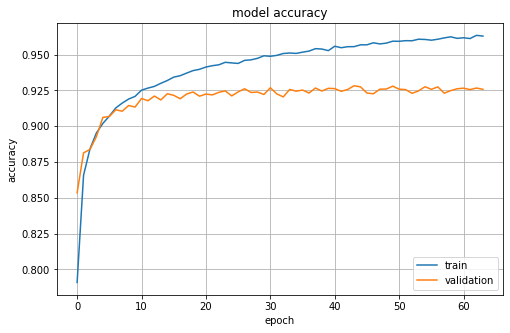

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()